<a href="https://colab.research.google.com/github/edwardam5/505_Final_Project/blob/main/505_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Analysis of ABC International Bank's Churn Rate** 

Group 4: Jonathan Yoon, Amin Fesharaki, and Anusia Edward

In [ ]:
! pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Necessary Imports 
import pandas as pd 
from pandas.core.internals import concat

import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline 

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from fast_ml.model_development import train_valid_test_split

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing

**Preprocessing and EDA**

In [ ]:
# Loading in the data
bank = pd.read_csv("/content/sample_data/Bank Customer Churn Prediction.csv")
# Checking shape of data 
bank.shape

(10000, 12)

In [ ]:
# Visualizing the data 
bank.head(3)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
# correcting variable types 
bank['country'] = bank['country'].astype('category')
bank['gender'] = bank['gender'].astype('category')
bank['credit_card'] = bank['credit_card'].astype('category')
bank['active_member'] = bank['active_member'].astype('category')
bank['churn'] = bank['churn'].astype('category') 
bank.dtypes

customer_id            int64
credit_score           int64
country             category
gender              category
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card         category
active_member       category
estimated_salary     float64
churn               category
dtype: object

Variable types were corrected for in order to ensure that future operaitons were able to be carried out without any issues. 

In [ ]:
# descriptive stats for numerical variables 
bank[['credit_score', 'age', 'tenure', 'balance', 'products_number', 
      'estimated_salary']].describe()

,credit_score,age,tenure,balance,products_number,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
bank.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

The .nunique() function was used in order to get an idea of the different outcomes for each of the variables. This is important for determining the type of recoding that will need to take place for the categorical variables in terms of whether or not the categorical variables were binary, ordinal, or nominal. 

In [ ]:
bank.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There were no null values found within the dataset. 

In [ ]:
# Histograms of Numerical Variables 
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=("Credit Score", "Age", "tenure", "Balance", 
                    "Products Number","Estimated Salary"))

fig.add_trace(
    go.Histogram(x=bank['credit_score']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=bank['age']),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=bank['tenure']),
    row=1, col=3
)

fig.add_trace(
    go.Histogram(x=bank['balance']),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=bank['products_number']),
    row=2, col=2
)

fig.add_trace(
    go.Histogram(x=bank['estimated_salary']),
    row=2, col=3
)

fig.update_layout(height=600, width=800, 
                  title_text="Histograms of Numerical Variables",
                  bargap=0.2)
fig.show()

Based on the histograms produced above, the variables ‘age’ and ‘products_number’ had a right-skewed distribution. The variables ‘balance’ and ‘credit_score’ had a left-skewed distribution, while ‘tenure’ and ‘estimated_salary’ had a uniform distribution.

In [ ]:
# Boxplots of Numerical Variables 
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=("Credit Score", "Age", "tenure", "Balance", 
                    "Products Number","Estimated Salary"))

fig.add_trace(
    go.Box(x=bank['credit_score']),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=bank['age']),
    row=1, col=2
)

fig.add_trace(
    go.Box(x=bank['tenure']),
    row=1, col=3
)

fig.add_trace(
    go.Box(x=bank['balance']),
    row=2, col=1
)

fig.add_trace(
    go.Box(x=bank['products_number']),
    row=2, col=2
)

fig.add_trace(
    go.Box(x=bank['estimated_salary']),
    row=2, col=3
)

fig.update_layout(height=600, width=800, 
                  title_text="Boxplots of Numerical Variables")
fig.show()

Looking at the boxplots produced above for each of the numeric variables it is evident that the variables of ‘credit_score’ and ‘age’ have outliers. However upon further inspection of the outliers in ‘credit_score’ and ‘age’ it can be concluded that the values are plausible and indicative of the actual range of credit scores and ages of possible members.

In [ ]:
# Categorical Variables Distributions 
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=("Country", "Gender", "Credit Card", "Active Member", 
                    "Churn"))

fig.add_trace(
    go.Histogram(x=bank['country']),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=bank['gender']),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=bank['credit_card']),
    row=1, col=3
)

fig.add_trace(
    go.Histogram(x=bank['active_member']),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=bank['churn']),
    row=2, col=2
)

fig.update_layout(height=600, width=800, 
                  title_text="Histograms of Categorical Variables",
                  bargap=0.2)
fig.show()

In [ ]:
# Dummy coding the categorical variables country and then gender
bank_cat = pd.concat([bank, pd.get_dummies(bank['country'], 
                                           prefix='country')], axis=1)

# binary encoding gender 
bank_cat['Gender_Male'] = bank_cat['gender'].map( {'Male':1, 'Female':0} )

# dropping country, gender, and customer_id from new df 
bank_cat.drop(['country', 'gender', 'customer_id'], axis=1, inplace=True)

bank_cat.head(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,0


In [ ]:
# Splitting the data random-strat into training, validation, and testing sets 
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(
    bank_cat, target = 'churn', train_size = 0.4, valid_size=0.35, 
    test_size=0.25
)

# checking the dimensions 
print('x_train:', x_train.shape, 'y_train:',y_train.shape)
print('x_valid:', x_valid.shape, 'y_valid:', y_valid.shape)
print('x_test:', x_test.shape, 'y_test', y_test.shape)

x_train: (4000, 12) y_train: (4000,)
x_valid: (3500, 12) y_valid: (3500,)
x_test: (2500, 12) y_test (2500,)


In [ ]:
# normalizing the numeric data based on the train  
scaler = preprocessing.StandardScaler()
scaler.fit(x_train[['credit_score', 'age', 'tenure', 'balance', 
                    'products_number', 'estimated_salary']])
tNorm = pd.concat([pd.DataFrame(scaler.transform(bank_cat[['credit_score', 
                                                           'age', 'tenure', 
                                                           'balance',
                                                           'products_number', 
                                                           'estimated_salary']]), 
                                 columns=['z_credit_score', 'z_age', 'z_tenure', 
                                          'z_balance','z_products_number', 
                                          'z_estimated_salary']),
                   bank_cat[['credit_card', 'active_member', 'churn',
                             'country_France', 'country_Germany', 
                             'country_Spain', 'Gender_Male']]],axis=1)

# setting the normalized using the index 
trainNorm = tNorm.iloc[x_train.index]
validNorm = tNorm.iloc[x_valid.index]
testNorm = tNorm.iloc[x_test.index]

# adjusting the sets to have the normalized data 
x_train = trainNorm[['z_credit_score', 'z_age', 'z_tenure','z_balance',
                     'z_products_number','z_estimated_salary', 'credit_card', 
                     'active_member','country_France', 'country_Germany',
                     'country_Spain', 'Gender_Male']]
x_valid = validNorm[['z_credit_score', 'z_age', 'z_tenure','z_balance',
                     'z_products_number','z_estimated_salary', 'credit_card', 
                     'active_member','country_France', 'country_Germany',
                     'country_Spain', 'Gender_Male']]
x_test = testNorm[['z_credit_score', 'z_age', 'z_tenure','z_balance',
                     'z_products_number','z_estimated_salary', 'credit_card', 
                     'active_member','country_France', 'country_Germany',
                     'country_Spain', 'Gender_Male']]

In [ ]:
# checking the dimensions to ensure normalization was done correctly 
print('x_train:', x_train.shape, 'y_train:',y_train.shape)
print('x_valid:', x_valid.shape, 'y_valid:', y_valid.shape)
print('x_test:', x_test.shape, 'y_test', y_test.shape)

x_train: (4000, 12) y_train: (4000,)
x_valid: (3500, 12) y_valid: (3500,)
x_test: (2500, 12) y_test (2500,)


In [ ]:
 px.histogram(bank,y='country',color='churn',barmode='group',text_auto=True,
              color_discrete_sequence=px.colors.sequential.Blugrn,
             width=600, height=600)

Looking at the chart above it is clear that the country with the most members associated with the American Bank of Commerce is France with a total of 5014 members. The country with the least number of members is Germany with a total of 2509 members. Spain has a total of 2477 members. It is also evident that Germany has the highest churn rate (32.4%) in comparison to Spain (16.7%) and France (16.2%). 

In [ ]:
px.histogram(bank, x='credit_card', color = 'churn', barmode = 'group',
             color_discrete_sequence=px.colors.sequential.Blugrn,
             width=600, height=600)

When looking at the figure above, it is evident that for credit card holders (1), the majority of credit card holders are non-churners as seen in dark green. The same trend was seen for non-credit card holders (0). It should be noted however, when comparing credit card holders with non-crdedit card holders, it is evident that those with credit cards have a higher chance of churning (25.3%) than those that do not have a credit card (20.8%). This observation makes intuitive sense, as those with credit cards are likely to make purchases on credit leading to credit debt. In turn, credit debt will force customers into involuntary churn, where they leave the bank due to their inability to pay back the purchases made.

In [ ]:
px.histogram(bank, x='gender', color = 'churn', barmode = 'group',
             color_discrete_sequence=px.colors.sequential.Blugrn,
             width=600, height=600)

Looking at the chart above it is clear that there are more male members (5457) than female members (4543) associated with the American Bank of Commerce. The chart above also indicates that women (25.1%) have a higher percentage of churning than males (16.5%). 

In [ ]:
px.histogram(bank, x='active_member', color = 'churn', barmode = 'group',
             color_discrete_sequence=px.colors.sequential.Blugrn,
             width=600, height=600)

Looking at the chart above it is clear that there are more active members (5151) than non-active members (4849) associated with the American Bank of Commerce. The chart above also indicates that non-active members (26.9%) have a higher percentage of churning than active members (14.3%). 

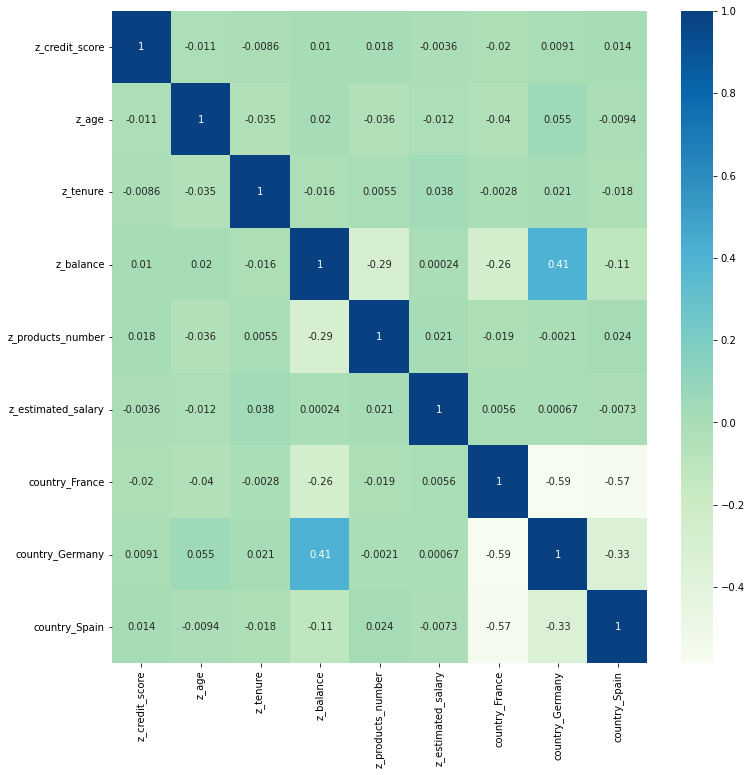

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data=x_train.corr(), annot=True,cmap = "GnBu");

From this heat map it should be noted that there are no concerns of multicollinearity within the variables as all of the variables have a correlation value less than 0.7.  

Variables to use: 
- x_train, x_test 

- x_valid, y_valid

- y_train, y_test

**Models and Model Evaluations**

In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(penalty='l2')
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_valid)
print(classification_report(y_valid, lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2794
           1       0.62      0.23      0.34       706

    accuracy                           0.82      3500
   macro avg       0.73      0.60      0.62      3500
weighted avg       0.79      0.82      0.78      3500



Logistic regression model with penalty L2 gives an accuracy of 0.81.

In [ ]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.2 MB/s 


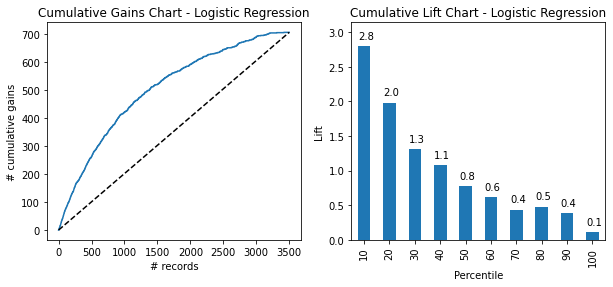

In [ ]:
# Gains Chart of Logistic Regression Model
from dmba import gainsChart, liftChart
lr_proba = lr.predict_proba(x_valid)
lr_result = pd.DataFrame(
    {
        "actual": y_valid,
        "p(0)": [p[0] for p in lr_proba],
        "p(1)": [p[1] for p in lr_proba],
        "predicted": lr.predict(x_valid),
    }
).astype('float64')

lr_result = lr_result.sort_values(['p(1)'], ascending = False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(lr_result.actual, ax=axes[0])
liftChart(lr_result.actual, title=False, ax=axes[1])
axes[0].set_title("Cumulative Gains Chart - Logistic Regression")
axes[1].set_title("Cumulative Lift Chart - Logistic Regression")
plt.show()

In [ ]:
# Naïve Bayes model
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_valid)
print(classification_report(y_valid, nb_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2794
           1       0.58      0.40      0.47       706

    accuracy                           0.82      3500
   macro avg       0.72      0.66      0.68      3500
weighted avg       0.80      0.82      0.81      3500



Naïve Bayes model (Gaussian) gives an accuracy of 0.82.

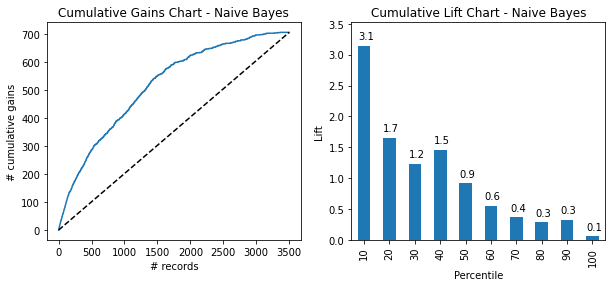

In [ ]:
# Naive Bayes model GainsChart
nb_proba = nb.predict_proba(x_valid)
nb_result = pd.DataFrame(
    {
        "actual": y_valid,
        "p(0)": [p[0] for p in nb_proba],
        "p(1)": [p[1] for p in nb_proba],
        "predicted": nb.predict(x_valid),
    }
).astype('float64')

nb_result = nb_result.sort_values(['p(1)'], ascending = False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(nb_result.actual, ax=axes[0])
liftChart(nb_result.actual, title=False, ax=axes[1])
axes[0].set_title("Cumulative Gains Chart - Naive Bayes")
axes[1].set_title("Cumulative Lift Chart - Naive Bayes")
plt.show()

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Normalizer
# Normalization of the variables
norm = Normalizer()
norm.fit(x_train)
x_train_norm = norm.transform(x_train)
x_valid_norm = norm.transform(x_valid)
x_test_norm = norm.transform(x_test)

clf = MLPClassifier(max_iter = 300)
clf.fit(x_train_norm, y_train)
clf_pred = clf.predict(x_valid_norm)
print(classification_report(y_valid, clf_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2794
           1       0.76      0.48      0.59       706

    accuracy                           0.86      3500
   macro avg       0.82      0.72      0.75      3500
weighted avg       0.85      0.86      0.85      3500



Neural Network (MLP Classifier) gives an accuracy of 0.86.

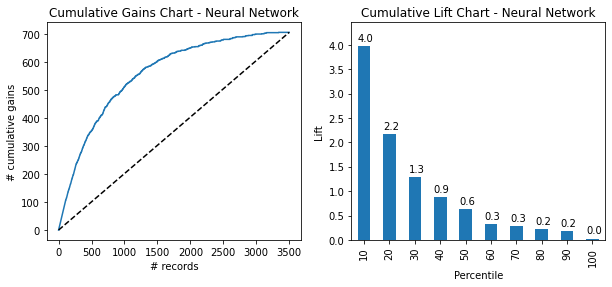

In [ ]:
# Neural Network Gains Chart
clf_proba = clf.predict_proba(x_valid_norm)
clf_result = pd.DataFrame(
    {
        "actual": y_valid,
        "p(0)": [p[0] for p in clf_proba],
        "p(1)": [p[1] for p in clf_proba],
        "predicted": clf_pred,
    }
).astype('float64')

clf_result = clf_result.sort_values(['p(1)'], ascending = False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(clf_result.actual, ax=axes[0])
liftChart(clf_result.actual, title=False, ax=axes[1])
axes[0].set_title("Cumulative Gains Chart - Neural Network")
axes[1].set_title("Cumulative Lift Chart - Neural Network")
plt.show()

In [ ]:
# K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for r in range (1, 10): 
    knn = KNeighborsClassifier(n_neighbors=r)
    knn.fit(x_train, y_train)
    k_pred = knn.predict(x_valid)
    
    print(f'neighbors: {r}')
    print(f'accuracy: {accuracy_score(y_valid, k_pred)}')

neighbors: 1
accuracy: 0.802
neighbors: 2
accuracy: 0.8322857142857143
neighbors: 3
accuracy: 0.822
neighbors: 4
accuracy: 0.8357142857142857
neighbors: 5
accuracy: 0.8354285714285714
neighbors: 6
accuracy: 0.8357142857142857
neighbors: 7
accuracy: 0.8388571428571429
neighbors: 8
accuracy: 0.8402857142857143
neighbors: 9
accuracy: 0.8454285714285714


In [ ]:
# k = 9 shows the highest accuracy
k9 = KNeighborsClassifier(n_neighbors=9)
k9.fit(x_train, y_train)
k9_pred = k9.predict(x_valid)
print(classification_report(y_valid, k9_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2794
           1       0.69      0.42      0.52       706

    accuracy                           0.85      3500
   macro avg       0.78      0.69      0.72      3500
weighted avg       0.83      0.85      0.83      3500



K-nearest neighbor model (n=9) shows the accuracy of 0.85.

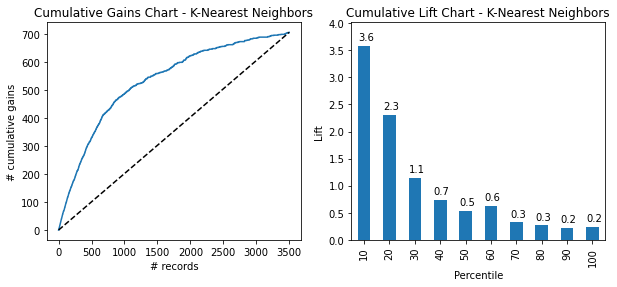

In [ ]:
k9_proba = k9.predict_proba(x_valid)
k9_result = pd.DataFrame(
    {
        "actual": y_valid,
        "p(0)": [p[0] for p in k9_proba],
        "p(1)": [p[1] for p in k9_proba],
        "predicted": k9_pred,
    }
).astype('float64')

k9_result = k9_result.sort_values(['p(1)'], ascending = False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(k9_result.actual, ax=axes[0])
liftChart(k9_result.actual, title=False, ax=axes[1])
axes[0].set_title("Cumulative Gains Chart - K-Nearest Neighbors")
axes[1].set_title("Cumulative Lift Chart - K-Nearest Neighbors")
plt.show()

Amin

In [ ]:
from dmba import gainsChart, liftChart

no display found. Using non-interactive Agg backend


Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Initital Params Search
param_grid = {
    "max_depth": [5, 10, 25, 60],
    "min_samples_leaf": [1, 5, 10, 20],
    "min_impurity_decrease": [0, 0.001, 0.01],
    "min_samples_split": [5, 10, 25, 50, 75, 100],
}

# Grid Search for Initital Params
gridSearch = GridSearchCV(
    DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1
)
gridSearch.fit(x_train, y_train)
print("Initial parameters: ", gridSearch.best_params_)

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 50}


In [ ]:
# Improving Parameters
param_grid = {
    "max_depth": [7, 8, 9, 10, 11, 12, 13, 14],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_impurity_decrease": [
        0,
        0.0001,
        0.00001,
        0.000001,
    ],
    "min_samples_split": [60, 65, 70, 75, 80, 85, 90],
}
gridSearch = GridSearchCV(
    DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1
)
gridSearch.fit(x_train, y_train)
print("Improved parameters: ", gridSearch.best_params_)

# Save best params
DecTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0, 'min_samples_leaf': 2, 'min_samples_split': 65}


In [ ]:
DecTree.fit(x_train, y_train)
Dec_pred = DecTree.predict(x_valid)
print(classification_report(y_valid, Dec_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2794
           1       0.70      0.44      0.54       706

    accuracy                           0.85      3500
   macro avg       0.78      0.70      0.72      3500
weighted avg       0.84      0.85      0.83      3500



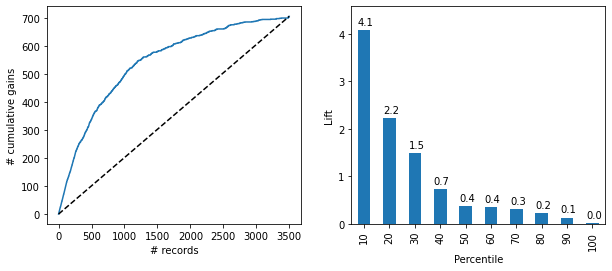

In [ ]:
# predicted probabilities for validation set
Dec_pred_prob_v = DecTree.predict_proba(x_valid)

# put it together in a data frame
Dec_result = pd.DataFrame(
    {
        "actual": y_valid,
        "p(0)": [p[0] for p in Dec_pred_prob_v],
        "p(1)": [p[1] for p in Dec_pred_prob_v],
        "predicted": DecTree.predict(x_valid),
    }
).astype('float64')

# lift chart for validation set
Dec_result = Dec_result.sort_values(by=["p(1)"], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(Dec_result.actual, ax=axes[0])
liftChart(Dec_result["p(1)"], title=False, ax=axes[1])

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    "n_estimators": [5, 25, 50, 75, 100],
    "max_depth": [1, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 7],
    "min_samples_leaf": [1, 2, 4],
}

gridSearch = GridSearchCV(
    RandomForestClassifier(), rf_param_grid, cv=5, n_jobs=-1
)
gridSearch.fit(x_train, y_train)
print("Initial parameters: ", gridSearch.best_params_)

Initial parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 50}


In [ ]:
# Improving Params
rf_param_grid = {
    "n_estimators": [60, 65, 70, 75, 80, 85],
    "max_depth": [11, 13, 14, 15, 16, 17, 18],
    "min_samples_split": [4, 5, 6],
    "min_samples_leaf": [1, 2],
}

gridSearch = GridSearchCV(
    RandomForestClassifier(), rf_param_grid, cv=5, n_jobs=-1
)
gridSearch.fit(x_train, y_train)
print("Improved parameters: ", gridSearch.best_params_)


# Save best params
rf = gridSearch.best_estimator_


Improved parameters:  {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 80}


In [ ]:
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_valid)
print(classification_report(y_valid, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2794
           1       0.77      0.48      0.60       706

    accuracy                           0.87      3500
   macro avg       0.83      0.72      0.76      3500
weighted avg       0.86      0.87      0.85      3500



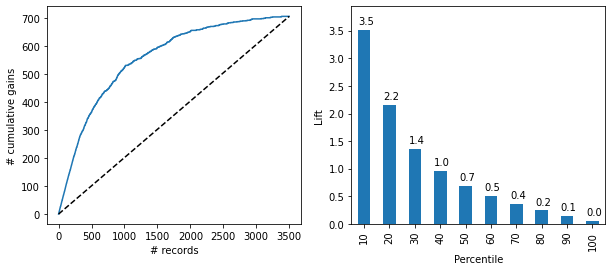

In [ ]:
# predicted probabilities for validation set
rf_pred_prob_v = rf.predict_proba(x_valid)

# put it together in a data frame
rf_result = pd.DataFrame(
    {
        "actual": y_valid,
        "p(0)": [p[0] for p in rf_pred_prob_v],
        "p(1)": [p[1] for p in rf_pred_prob_v],
        "predicted": rf.predict(x_valid),
    }
).astype('float64')

# lift chart for validation set
rf_result = rf_result.sort_values(by=["p(1)"], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(rf_result.actual, ax=axes[0])
liftChart(rf_result["p(1)"], title=False, ax=axes[1])

Linear Discriminant Analysis 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda_param_grid = {
    "solver": ["lsqr"],
    "shrinkage": [0, 0.008, 0.0001, 0.000115, 0.00015],
}

gridSearch = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=lda_param_grid, cv=5)
gridSearch.fit(x_train, y_train)
print("Best parameters: ", gridSearch.best_params_)

# Save best params
LDA = gridSearch.best_estimator_

Best parameters:  {'shrinkage': 0.0001, 'solver': 'lsqr'}


In [ ]:
LDA.fit(x_train, y_train)
LDA_pred = LDA.predict(x_valid)
print(classification_report(y_valid, LDA_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2794
           1       0.58      0.26      0.36       706

    accuracy                           0.81      3500
   macro avg       0.71      0.60      0.62      3500
weighted avg       0.78      0.81      0.78      3500



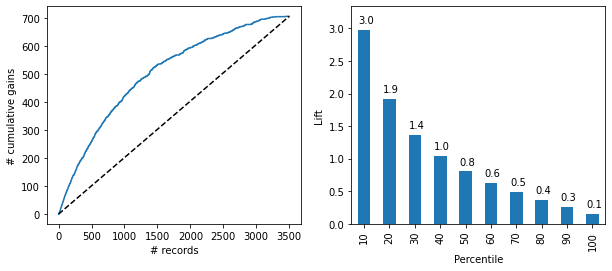

In [ ]:
# predicted probabilities for validation set
lda_pred_prob_v = LDA.predict_proba(x_valid)

# put it together in a data frame
lda_result = pd.DataFrame(
    {
        "actual": y_valid,
        "p(0)": [p[0] for p in lda_pred_prob_v],
        "p(1)": [p[1] for p in lda_pred_prob_v],
        "predicted": LDA.predict(x_valid),
    }
).astype('float64')

# lift chart for validation set
lda = lda_result.sort_values(by=["p(1)"], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(lda.actual, ax=axes[0])
liftChart(lda["p(1)"], title=False, ax=axes[1])

In [ ]:
# All models with test sets

lr_pred_test = lr.predict(x_test)
nb_pred_test = nb.predict(x_test)
clf_pred_test = clf.predict(x_test_norm)
k9_pred_test = k9.predict(x_test)
dec_pred_test = DecTree.predict(x_test)
rf_pred_test = rf.predict(x_test)
lda_pred_test = LDA.predict(x_test)

print("Logistic Regression Model Summary")
print(classification_report(y_test, lr_pred_test))
print("Naïve Bayes Model Summary")
print(classification_report(y_test, nb_pred_test))
print("Neural Network Model Summary")
print(classification_report(y_test, clf_pred_test))
print("K-Nearest Neighbor Model Summary")
print(classification_report(y_test, k9_pred_test))
print("Decision Tree Model Summary")
print(classification_report(y_test, dec_pred_test))
print("Random Forest Model Summary")
print(classification_report(y_test, rf_pred_test))
print("Linear Discriminant Analysis Model Summary")
print(classification_report(y_test, lda_pred_test))

Logistic Regression Model Summary
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1984
           1       0.62      0.23      0.33       516

    accuracy                           0.81      2500
   macro avg       0.72      0.60      0.61      2500
weighted avg       0.78      0.81      0.78      2500

Naïve Bayes Model Summary
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1984
           1       0.56      0.35      0.43       516

    accuracy                           0.81      2500
   macro avg       0.71      0.64      0.66      2500
weighted avg       0.79      0.81      0.79      2500

Neural Network Model Summary
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1984
           1       0.72      0.41      0.52       516

    accuracy                           0.85      2500
   macro avg       0.79      0.68      

In [ ]:
# Initial Params
NN_param_grid = {
    "hidden_layer_sizes": [1, 5, 10, 15, 20],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "max_iter": [1000, 1500],
}

gridSearch = GridSearchCV(MLPClassifier(), NN_param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print("Improved parameters: ", gridSearch.best_params_)


# Save best params
NN_tune = gridSearch.best_estimator_

In [ ]:
# Improved Params
NN_param_grid = {
    "hidden_layer_sizes": [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
    ],
    "activation": ["identity"],
    "solver": ["sgd"],
    "learning_rate": ["adaptive"],
    "max_iter": [300, 400, 500, 750, 1000],
}

gridSearch = GridSearchCV(
    MLPClassifier(random_state=12345), NN_param_grid, cv=5, n_jobs=-1
)
gridSearch.fit(X_train, y_train)
print("Improved parameters: ", gridSearch.best_params_)


# Save best params
NN_tune = gridSearch.best_estimator_

print("Classification Summary for Training Set")
classificationSummary(y_train, NN_tune.predict(X_train))
print("Classification Summary for Validation Set")
classificationSummary(y_valid, NN_tune.predict(X_valid))